In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-price-prediction-dataset/RGRResults_train.csv
/kaggle/input/boston-house-price-prediction-dataset/RGRResults_test.csv
/kaggle/input/boston-house-price-prediction-dataset/housing.csv


In [2]:

df = pd.read_csv("/kaggle/input/boston-house-price-prediction-dataset/housing.csv", delim_whitespace=True)


print("Shape:", df.shape)
df.head()


Shape: (505, 14)


/tmp/ipykernel_13/1471359953.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("/kaggle/input/boston-house-price-prediction-dataset/housing.csv", delim_whitespace=True)


,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [3]:
df.columns = [
    'CRIM',     # per capita crime rate by town
    'ZN',       # proportion of residential land zoned for large lots
    'INDUS',    # proportion of non-retail business acres
    'CHAS',     # Charles River dummy variable
    'NOX',      # nitric oxides concentration
    'RM',       # average number of rooms
    'AGE',      # proportion of older homes
    'DIS',      # distances to employment centers
    'RAD',      # accessibility to radial highways
    'TAX',      # property-tax rate
    'PTRATIO',  # pupil-teacher ratio
    'B',        # ethnicity index
    'LSTAT',    # lower status population %
    'MEDV'      # target: Median value of owner-occupied homes ($1000s)
]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.duplicated().sum()

0

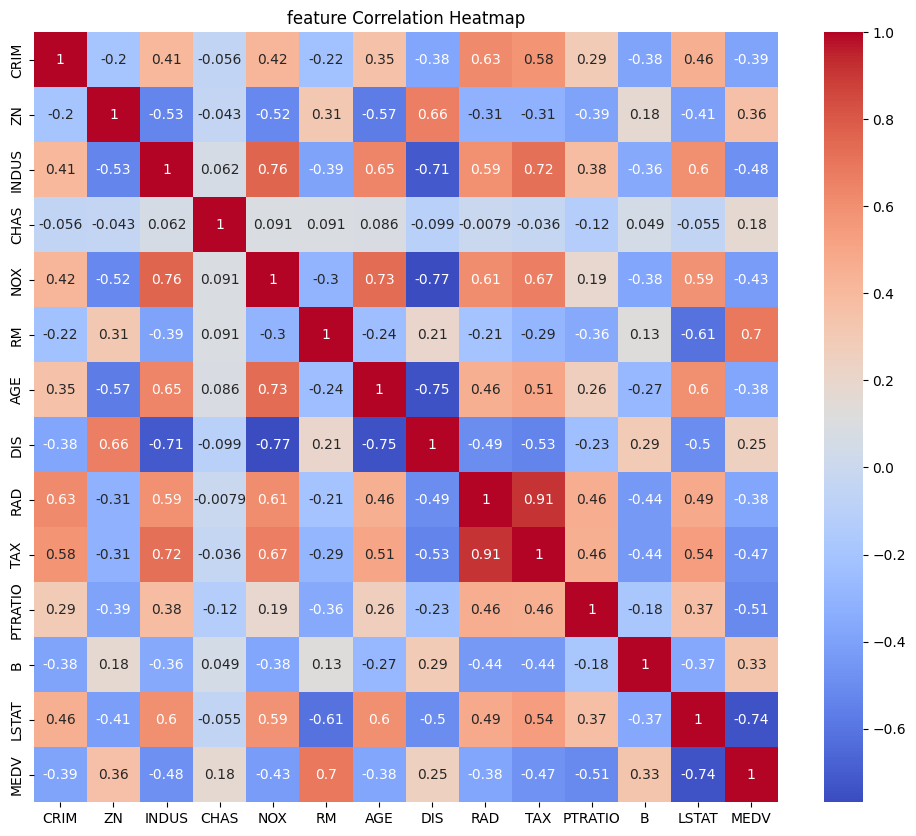

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('feature Correlation Heatmap')
plt.show()

In [9]:
X = df.drop("MEDV", axis=1)
y = df['MEDV']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [13]:
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
elastic.fit(X_train_scaled, y_train)

ElasticNet()

In [14]:
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_elastic = elastic.predict(X_test_scaled)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

print('Ridge RMSE:', mean_squared_error(y_test, y_pred_ridge, squared=False))
print('Ridge R2 :', r2_score(y_test, y_pred_ridge))

Ridge RMSE: 4.9313787610024615
Ridge R2 : 0.563575820716282


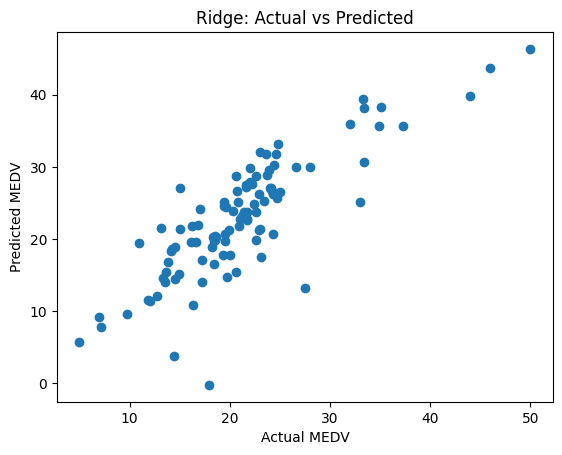

In [16]:
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Actual MEDV")
plt.ylabel('Predicted MEDV')
plt.title('Ridge: Actual vs Predicted')
plt.show()

In [17]:
import joblib
joblib.dump(ridge, 'ridge_model.pkl')

['ridge_model.pkl']

In [18]:
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Lasso RMSE:", lasso_rmse)
print("Lasso R²:", lasso_r2)


Lasso RMSE: 4.929106860743604
Lasso R²: 0.5639778518145521


In [19]:
elastic_rmse = mean_squared_error(y_test, y_pred_elastic, squared=False)
elastic_r2 = r2_score(y_test, y_pred_elastic)

print("ElasticNet RMSE:", elastic_rmse)
print("ElasticNet R²:", elastic_r2)

ElasticNet RMSE: 4.684699850364194
ElasticNet R²: 0.6061456697497213


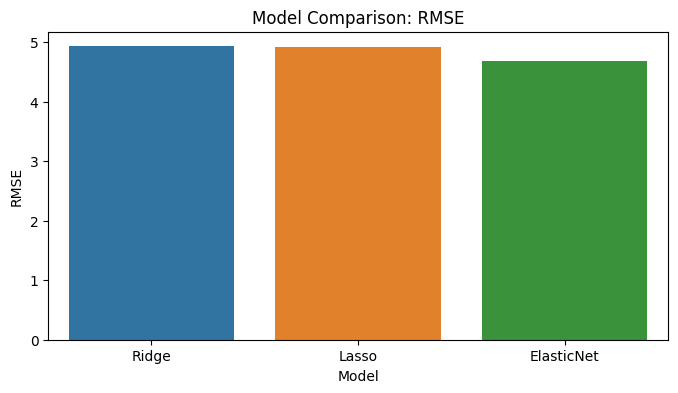

,Model,RMSE,R² Score
0,Ridge,4.931379,0.563576
1,Lasso,4.929107,0.563978
2,ElasticNet,4.684700,0.606146


In [20]:
results = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'ElasticNet'],
    'RMSE': [mean_squared_error(y_test, y_pred_ridge, squared=False),
             lasso_rmse,
             elastic_rmse],
    'R² Score': [r2_score(y_test, y_pred_ridge),
                 lasso_r2,
                 elastic_r2]
})


plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='RMSE', data=results)
plt.title('Model Comparison: RMSE')
plt.show()

results


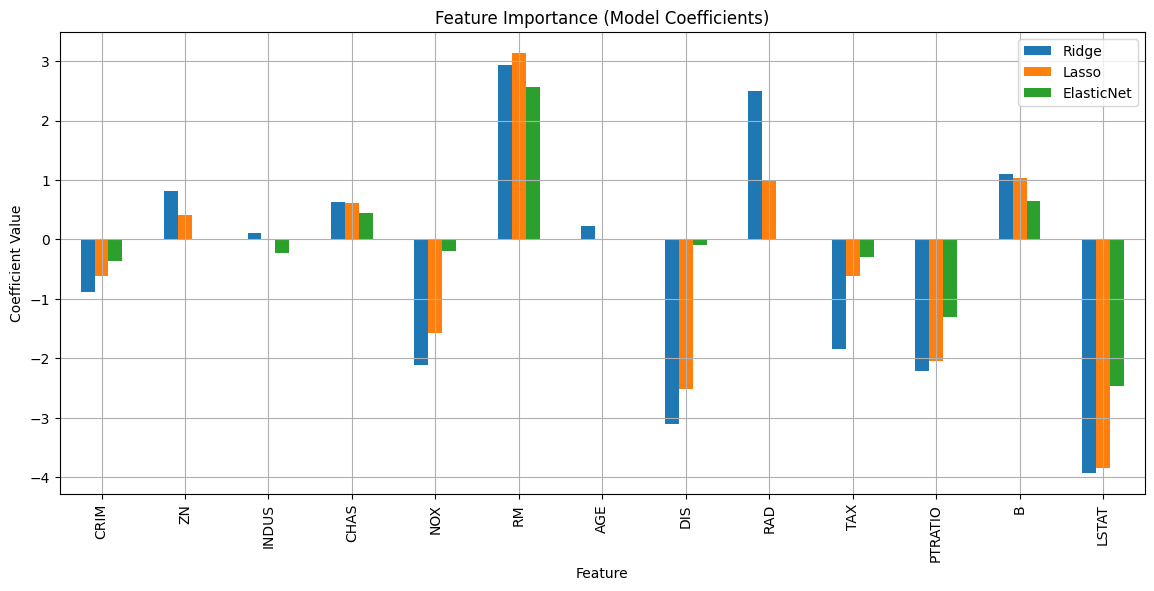

In [21]:

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_,
    'ElasticNet': elastic.coef_
})

coef_df.set_index("Feature", inplace=True)
coef_df.plot(kind='bar', figsize=(14, 6), title='Feature Importance (Model Coefficients)')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()


In [22]:
joblib.dump(lasso, 'lasso_model.pkl')

['lasso_model.pkl']

In [23]:
joblib.dump(elastic, 'elastic_model.pkl')

['elastic_model.pkl']